<a href="https://colab.research.google.com/github/KWSantos/Data-Science/blob/main/ML-Algorithms/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
O Naive Bayes é um algoritmo de classificação baseado no Teorema de Bayes, sendo também um método de aprendizado supervisionado.
Ele é particularmente útil para grandes conjuntos de dados devido à sua simplicidade e eficiência computacional. O algoritmo é chamado de "ingênuo" (naive) porque assume que os atributos previsores são independentes entre si,
uma suposição que nem sempre é verdadeira na realidade, mas que funciona muito bem na prática.

O cálculo central do Naive Bayes é fundamentado no Teorema de Bayes, que é expresso pela seguinte fórmula: $P(A|B) = (P(B|A) \* P(A)) / P(B)$,
Onde:

P(A∣B) é a probabilidade posterior da classe A, dado o previsor B.
P(B∣A) é a verossimilhança (likelihood) do previsor B, dada a classe A.
P(A) é a probabilidade a priori da classe A.
P(B) é a probabilidade a priori do previsor B.

Para um conjunto de dados com múltiplos atributos previsores, a fórmula é adaptada para calcular a probabilidade de uma determinada classe (por exemplo, "Risco Alto")dados os valores desses atributos (renda, histórico, dívida, etc.). Devido à suposição de independência, a fórmula se torna:
$P(y|x\_1, ..., x\_n) = (P(x\_1|y) \* P(x\_2|y) \* ... \* P(x\_n|y) \* P(y)) / P(x\_1, ..., x\_n)$

Onde y é a classe e x_1 a x_n são os atributos. O algoritmo calcula essa probabilidade para cada classe possível e seleciona a que tiver o maior valor.

Por exemplo, vamos considerar uma base de risco de crédito para decidir se um cliente representa um risco "alto", "moderado" ou "baixo". Suponha que temos os seguintes dados sobre um novo cliente:
Renda: Baixa
Histórico de crédito: Ruim
Dívida: Alta

O algoritmo Naive Bayes calcularia a probabilidade de cada classe de risco da seguinte maneira:
P(Risco Alto | Renda=Baixa, Histórico=Ruim, Dívida=Alta)
P(Risco Moderado | Renda=Baixa, Histórico=Ruim, Dívida=Alta)
P(Risco Baixo | Renda=Baixa, Histórico=Ruim, Dívida=Alta)
Para calcular a primeira probabilidade, o algoritmo usaria as frequências observadas no conjunto de treinamento:
$P(Risco Alto | ...) \\propto P(Renda=Baixa|Risco Alto) \* P(Histórico=Ruim|Risco Alto) \* P(Dívida=Alta|Risco Alto) \* P(Risco Alto)$
O termo de proporcionalidade (propto) é usado porque o denominador (P(Renda=Baixa,Histórico=Ruim,Dívida=Alta)) é o mesmo para todas as classes e não afeta a comparação. O algoritmo calcula este valor para as três classes de risco e classifica o cliente naquela que apresentar a maior probabilidade final.

A grande vantagem do Naive Bayes é sua rapidez e bom desempenho com dados de alta dimensionalidade, como na classificação de textos. No entanto, sua principal desvantagem é a suposição de independência dos atributos, que pode levar a resultados imprecisos se os atributos forem, na verdade, fortemente correlacionados.

Referências

https://scikit-learn.org/stable/modules/naive_bayes.html
https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed/
https://www.ibm.com/br-pt/think/topics/naive-bayes
"""

#Risco de Crédito


In [ ]:
import pickle as plk

In [ ]:
with open('credit.pkl', 'rb') as f:
    X_train_credit, X_test_credit, Y_train_credit, Y_test_credit = plk.load(f)

In [ ]:
X_train_credit

array([[-0.43804839, -0.45460195, -1.01855929],
       [-0.11572219,  2.55296372, -0.72592065],
       [ 0.85125641,  0.11645482, -0.47282777],
       ...,
       [-0.27688529, -0.01679176,  1.17227596],
       [-0.92153769, -0.45460195,  0.06499461],
       [-0.92153769, -0.26424969,  0.38136071]])

In [ ]:
X_test_credit

array([[-0.76037459, -0.51170763, -0.75755726],
       [-0.27688529,  2.17225921,  0.38136071],
       [-0.11572219,  0.07838437, -1.31119794],
       ...,
       [ 0.85125641, -0.30232015, -0.5677376 ],
       [-1.08270079, -0.97997418, -1.04228675],
       [-0.27688529, -0.4926724 , -0.72592065]])

In [ ]:
Y_train_credit

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
Y_test_credit

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
X_train_credit.shape, Y_train_credit.shape, X_test_credit.shape, Y_test_credit.shape

((24432, 3), (24432,), (8144, 3), (8144,))

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_train_credit, Y_train_credit)

GaussianNB()

In [ ]:
predicts = naive_credit_data.predict(X_test_credit)

In [ ]:
accept = 0
error = 0
for i in range(len(predicts)):
    if predicts[i] != Y_test_credit[i]:
        print(f'{i+1}: Erro')
        error += 1
    else:
        print(f'{i+1}: OK')
        accept += 1
print(f'Acertos: {accept}')
print(f'Erros: {error}')
print(f'Acurácia: {accept/len(predicts)}')
print(f'Erro: {(error/len(predicts))}')

A saída de streaming foi truncada nas últimas 5000 linhas.
3149: OK
3150: OK
3151: OK
3152: OK
3153: OK
3154: Erro
3155: OK
3156: Erro
3157: OK
3158: OK
3159: OK
3160: OK
3161: OK
3162: OK
3163: OK
3164: OK
3165: OK
3166: OK
3167: Erro
3168: OK
3169: Erro
3170: OK
3171: Erro
3172: OK
3173: OK
3174: OK
3175: OK
3176: OK
3177: OK
3178: OK
3179: Erro
3180: OK
3181: OK
3182: Erro
3183: OK
3184: OK
3185: OK
3186: OK
3187: OK
3188: OK
3189: Erro
3190: OK
3191: OK
3192: OK
3193: Erro
3194: OK
3195: OK
3196: OK
3197: OK
3198: Erro
3199: OK
3200: OK
3201: Erro
3202: OK
3203: Erro
3204: OK
3205: OK
3206: OK
3207: OK
3208: OK
3209: Erro
3210: Erro
3211: OK
3212: OK
3213: OK
3214: OK
3215: OK
3216: OK
3217: OK
3218: OK
3219: Erro
3220: OK
3221: OK
3222: OK
3223: OK
3224: Erro
3225: OK
3226: OK
3227: OK
3228: OK
3229: OK
3230: Erro
3231: Erro
3232: OK
3233: OK
3234: OK
3235: Erro
3236: OK
3237: OK
3238: OK
3239: OK
3240: OK
3241: OK
3242: OK
3243: OK
3244: OK
3245: OK
3246: OK
3247: OK
3248: OK
324

In [ ]:
#Só pra confirmar
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(Y_test_credit, predicts)

0.8163064833005894

In [ ]:
print(classification_report(Y_test_credit, predicts))

              precision    recall  f1-score   support

           0       0.24      0.01      0.02      1470
           1       0.82      0.99      0.90      6674

    accuracy                           0.82      8144
   macro avg       0.53      0.50      0.46      8144
weighted avg       0.72      0.82      0.74      8144



0.8163064833005894

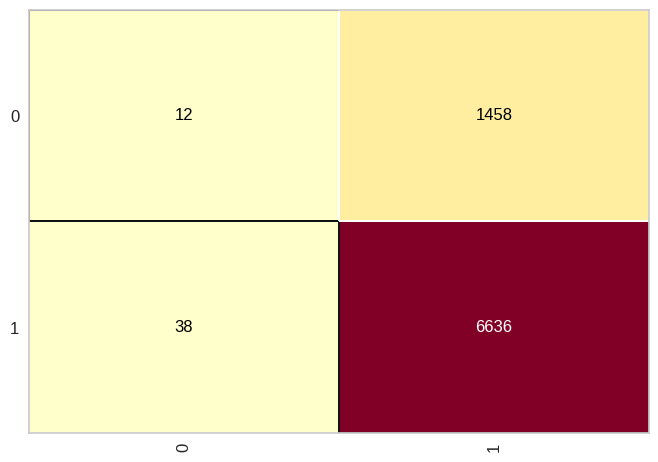

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(GaussianNB())
cm.fit(X_train_credit, Y_train_credit)
cm.score(X_test_credit, Y_test_credit)
#Podemos observar que o algoritmo previu bem clientes que não pagam o empréstimo, porém cometeu muitos erros ao classificar clientes que pagam
#Isso demonstra a limitação do algoritmo, dada a distribuição dos dados e o volume dos mesmos.
#Concluimos então que o algoritmo Naive-Bayes não é o mais adequado para o problema do risco de crédito.

#Censo Demográfico

In [ ]:
with open('census.pkl', 'rb') as f:
    X_train_census, Y_train_census, X_test_census,Y_test_census = plk.load(f)

In [ ]:
X_test_census.shape, X_train_census.shape, Y_test_census.shape, Y_train_census.shape

((4884, 108), (27676, 108), (4884,), (27676,))

In [ ]:
naive_census_data = GaussianNB()
naive_census_data.fit(X_train_census, Y_train_census)

GaussianNB()

In [ ]:
predicts = naive_census_data.predict(X_test_census)

In [ ]:
accept = 0
error = 0
for i in range(len(predicts)):
    if predicts[i] != Y_test_census[i]:
        print(f'{i+1}: Erro')
        error += 1
    else:
        print(f'{i+1}: OK')
        accept += 1
print(f'Acertos: {accept}')
print(f'Erros: {error}')
print(f'Acurácia: {accept/len(predicts)}')
print(f'Erro: {(error/len(predicts))}')

1: OK
2: Erro
3: OK
4: Erro
5: OK
6: OK
7: OK
8: Erro
9: OK
10: OK
11: Erro
12: Erro
13: OK
14: OK
15: Erro
16: Erro
17: Erro
18: Erro
19: OK
20: OK
21: OK
22: OK
23: OK
24: Erro
25: Erro
26: OK
27: Erro
28: OK
29: Erro
30: Erro
31: Erro
32: OK
33: OK
34: Erro
35: Erro
36: OK
37: Erro
38: OK
39: Erro
40: Erro
41: OK
42: Erro
43: OK
44: OK
45: Erro
46: Erro
47: OK
48: Erro
49: OK
50: Erro
51: Erro
52: Erro
53: OK
54: OK
55: OK
56: Erro
57: Erro
58: OK
59: OK
60: OK
61: Erro
62: Erro
63: OK
64: Erro
65: Erro
66: OK
67: Erro
68: OK
69: OK
70: Erro
71: Erro
72: Erro
73: OK
74: Erro
75: Erro
76: Erro
77: OK
78: Erro
79: OK
80: OK
81: OK
82: Erro
83: Erro
84: Erro
85: Erro
86: Erro
87: Erro
88: OK
89: Erro
90: Erro
91: OK
92: OK
93: Erro
94: OK
95: Erro
96: Erro
97: OK
98: Erro
99: Erro
100: Erro
101: Erro
102: Erro
103: Erro
104: Erro
105: Erro
106: OK
107: Erro
108: OK
109: OK
110: Erro
111: Erro
112: Erro
113: OK
114: OK
115: Erro
116: OK
117: Erro
118: OK
119: OK
120: OK
121: Erro
122: E

In [ ]:
print(classification_report(Y_test_census, predicts))

              precision    recall  f1-score   support

       <=50K       0.97      0.27      0.43      3759
        >50K       0.29      0.97      0.44      1125

    accuracy                           0.44      4884
   macro avg       0.63      0.62      0.44      4884
weighted avg       0.81      0.44      0.43      4884



0.4352989352989353

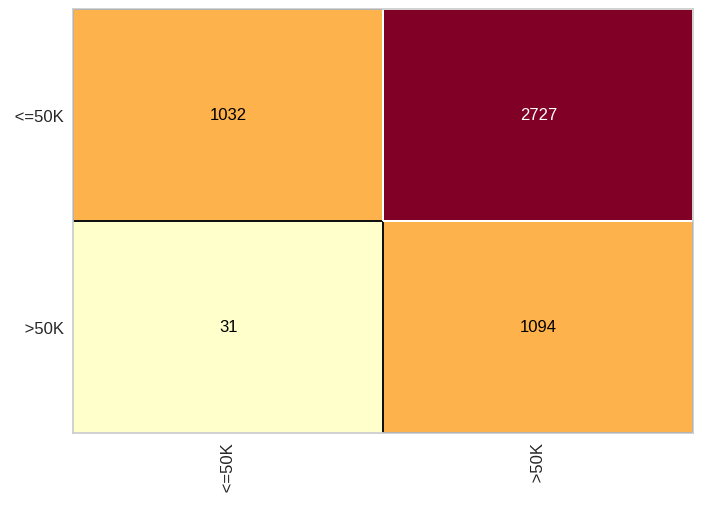

In [ ]:
cm = ConfusionMatrix(GaussianNB())
cm.fit(X_train_census, Y_train_census)
cm.score(X_test_census, Y_test_census)
#Nesse caso, o desempenho do algoritmo foi ainda pior, obtendo acurácia inferior a 50%
#Isso indica uma clara limitação do algoritmo, mesmo considerando um problema simples de classificação
#Portando, o algoritmo Naive-Bayes também não é indicado para o problema do Censo